**Problem Statement:**
The objective of the project is to develop a predictive model that can accurately estimate the value of second hand vehicles based on varous factors such as model,year,present price,kms driven,fueltype,sellertype,transmission.The goal is to crete a model that can provide reliable estimates of the resale value of used cars for buyers and sellers a like and also help delarship.

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#numpy-NumPy is a Python library used for working with arrays.
#pandas-Pandas is a Python library used for working with data sets.

**Reading and understanding the data**

In [ ]:
cars = pd.read_csv("/content/car data.csv")

In [ ]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
cars.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [ ]:
cars.shape

(301, 9)

In [ ]:
cars.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#Checking the null values.
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the columns present in the dataset.
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
#checking the count of a fuel_types present in the columns.
print(cars['Fuel_Type'].value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
cars.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

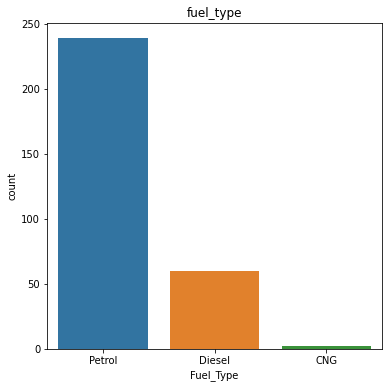

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'Fuel_Type', data=cars)
plt.title('fuel_type')
plt.show()

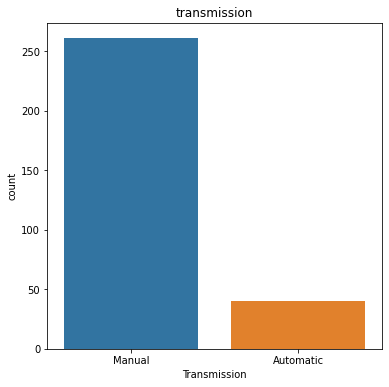

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'Transmission', data=cars)
plt.title('transmission')
plt.show()

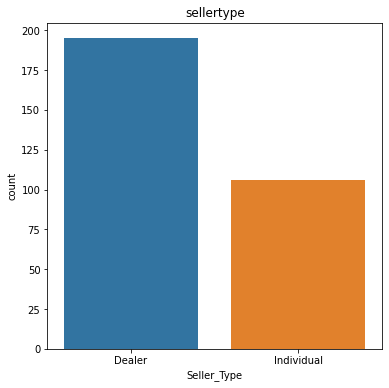

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x= 'Seller_Type', data=cars)
plt.title('sellertype')
plt.show()

In [ ]:
#Used one hot encoder to create a dummy column.
cars= pd.get_dummies(cars, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [ ]:
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


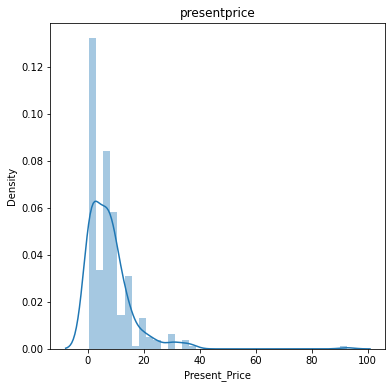

In [ ]:
#checking the distrubtion of the data.
plt.figure(figsize=(6,6))
sns.distplot(cars['Present_Price'])
plt.title('presentprice')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


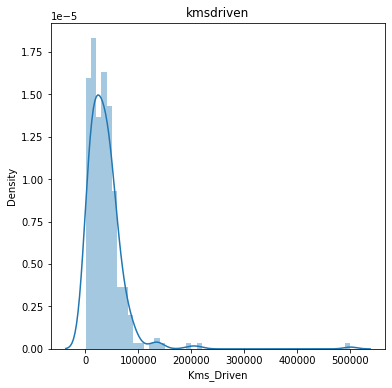

In [ ]:

plt.figure(figsize=(6,6))
sns.distplot(cars['Kms_Driven'])
plt.title('kmsdriven')
plt.show()

<AxesSubplot:>

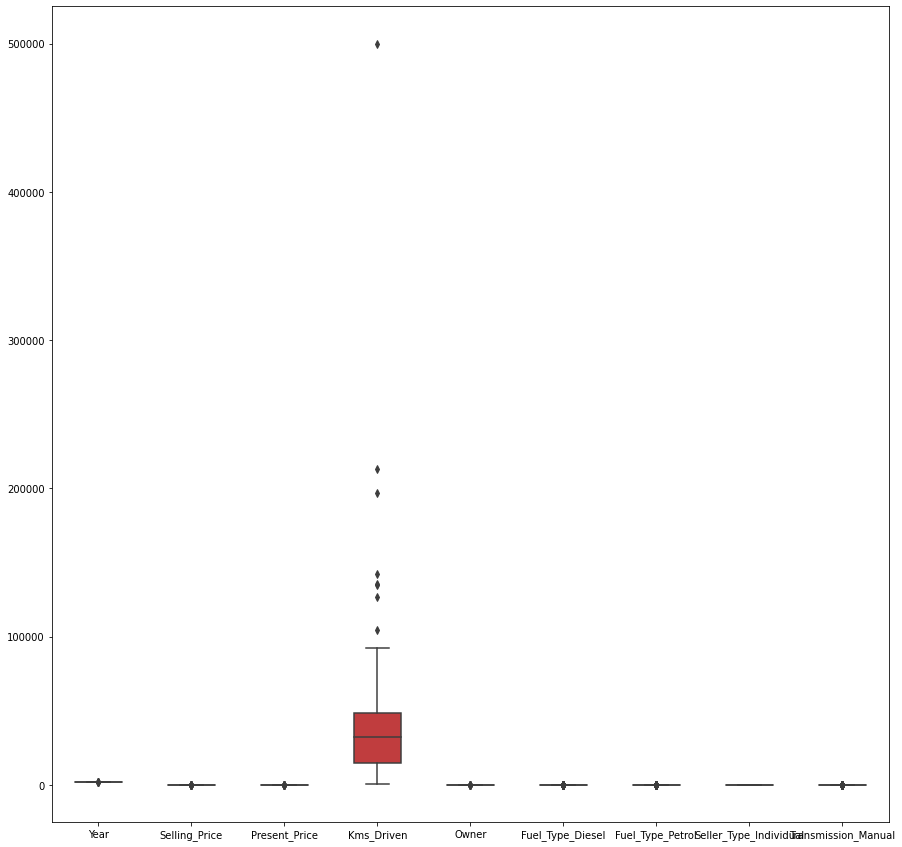

In [ ]:
#checking the outliers.
fig = plt.subplots(figsize=(15,15))
sns.boxplot(data=cars, width=0.5)

In [ ]:
#Removing outliers.
q = cars["Kms_Driven"].quantile(0.98)
df = cars[cars["Kms_Driven"]<q]

<AxesSubplot:>

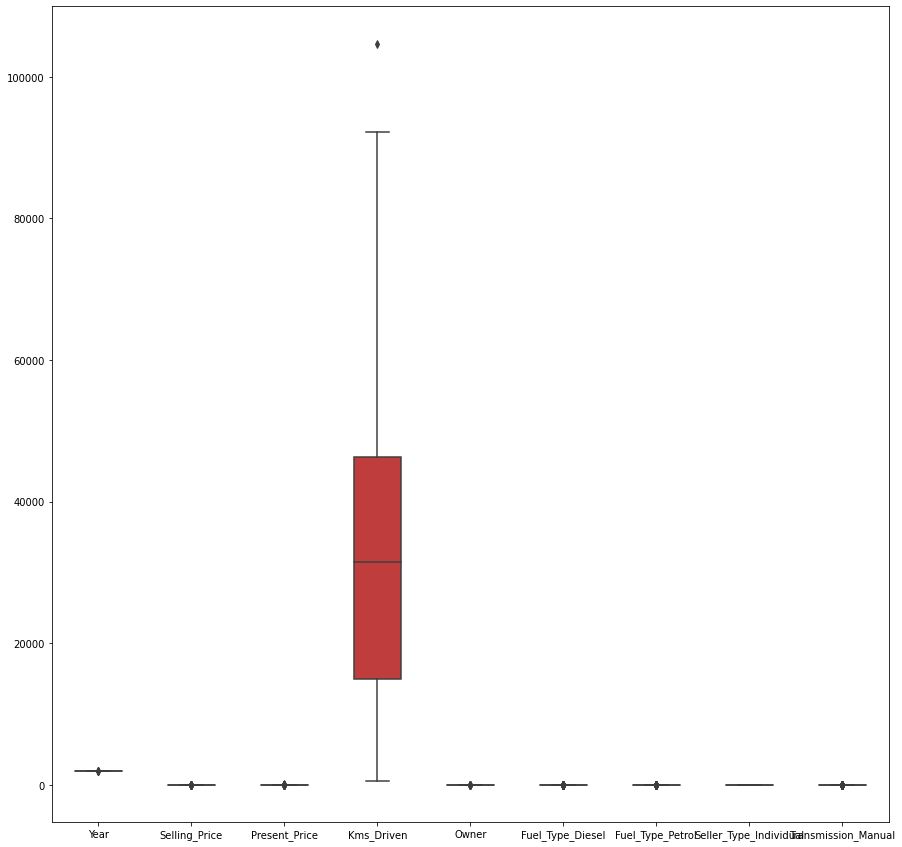

In [ ]:
fig = plt.subplots(figsize=(15,15))
sns.boxplot(data=df, width=0.5)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,2013.785714,4.689558,7.524388,32897.207483,0.034014,0.197279,0.795918,0.343537,0.877551
std,2.688301,5.075526,8.555563,21807.748817,0.181573,0.398623,0.403716,0.475699,0.328363
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.912500,1.215000,15000.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2014.500000,3.750000,6.250000,31427.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.757500,46320.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,104707.000000,1.000000,1.000000,1.000000,1.000000,1.000000


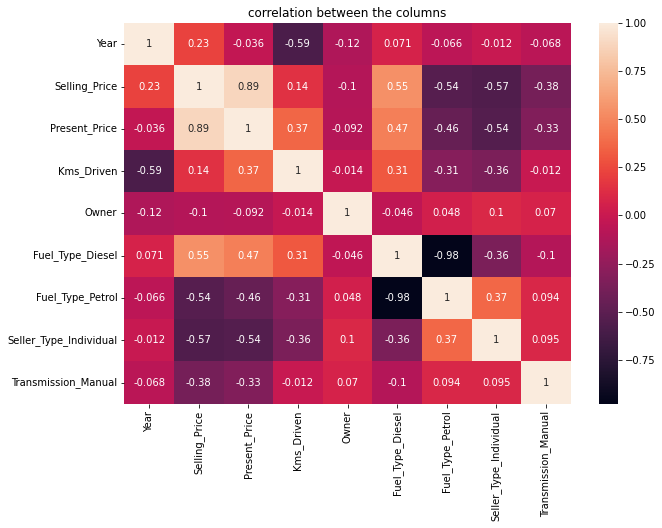

In [ ]:

#checking the correlation.
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title('correlation between the columns')
plt.show()


In [ ]:
train = df.sample(frac=0.70, random_state=151)
test = df.drop(train.index)

In [ ]:
X_train = train.drop('Selling_Price', axis=1)
y_train = train['Selling_Price']
X_test = test.drop('Selling_Price', axis=1)
y_test = test['Selling_Price']

In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, cars, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = cars[:,:-1], cars[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(cars, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["cars_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["cars_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, cars, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = cars[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                cars_left, cars_right = self.split(cars, feature_index, threshold)
                # check if childs are not null
                if len(cars_left)>0 and len(cars_right)>0:
                    y, left_y, right_y = cars[:, -1], cars_left[:, -1], cars_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["cars_left"] = cars_left
                        best_split["cars_right"] = cars_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, cars, feature_index, threshold):
        ''' function to split the data '''
        
        cars_left = np.array([row for row in cars if row[feature_index]<=threshold])
        cars_right = np.array([row for row in cars if row[feature_index]>threshold])
        return cars_left, cars_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3)
regressor.fit(X_train,y_train)
regressor.print_tree()

ValueError: ignored

In [ ]:
def mean_squared_error(Y_true, Y_pred):
    # Compute the mean squared error between Y_true and Y_pred
    mse = np.mean((Y_true - Y_pred)**2)
    return mse

In [ ]:
Y_pred = regressor.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print("Test MSE: ", mse) 


In [ ]:
def accuracy_score(y_true,Y_pred):
  correct=0
  for i in range(len(y_true)):
    if y_true[i] == Y_pred[i]:
      correct += 1
  return correct / float(len(y_true))    
    

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
print("Accuracy",accuracy)